In [19]:
import pandas as pd
import numpy as np

In [20]:
sis_df = pd.read_csv('SISData.csv')
course_size_df = pd.read_csv('CourseSize.csv')

df = pd.merge(sis_df, course_size_df, on=['TermSourceKey', 'Course'])
print(df.columns)

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['EmployeeID', 'TermSourceKey', 'TermKey', 'StudentKey', 'HighSchoolGPA',
       'SATMathScore', 'SATReadingWritingScore', 'SATMathOldScore',
       'SATWritingOldScore', 'SATReadingOldScore', 'ACTCompositeScore',
       'SourceAge', 'GenderDescription', 'EthnicityDescription',
       'MajorDescription', 'MilitaryStatusKey', 'FirstGenerationKey',
       'CumulativeTransferCredits', 'TransferGPA', 'CumulativeGPA',
       'CumulativeCreditsAttempted', 'CumulativeCreditsEarned',
       'AcademicLevelDescription', 'AcademicLoadTuitionDescription',
       'PellEligibilityIndicatorKey', 'Course', 'CourseLevel', 'Section',
       'Grade', 'PrevTermCreditsAttempted', 'PrevTermCreditsEarned',
       'PrevTermGPA', 'PrevMaxGrade', 'PrevMinGrade', 'CourseSize'],
      dtype='object')


In [21]:
top_dfw = pd.read_excel("DFW_100_Sp19.xlsx")
top_dfw_classes = top_dfw.Course.tolist()

df['Top100DFW'] = df.Course.isin(top_dfw_classes).astype(int)

In [22]:
df = pd.concat([df.drop('GenderDescription', axis=1), pd.get_dummies(df['GenderDescription'], prefix='Gender')], axis=1)
df = pd.concat([df.drop('EthnicityDescription', axis=1), pd.get_dummies(df['EthnicityDescription'], prefix='Ethnicity')], axis=1)
df = pd.concat([df.drop('FirstGenerationKey', axis=1), pd.get_dummies(df['FirstGenerationKey'], prefix='First_Gen')], axis=1)
df = pd.concat([df.drop('PellEligibilityIndicatorKey', axis=1), pd.get_dummies(df['PellEligibilityIndicatorKey'], prefix='Pell_Eligible')], axis=1)
df = pd.concat([df.drop('AcademicLoadTuitionDescription', axis=1), pd.get_dummies(df['AcademicLoadTuitionDescription'], prefix='Load')], axis=1)
df = pd.concat([df.drop('AcademicLevelDescription', axis=1), pd.get_dummies(df['AcademicLevelDescription'], prefix='Academic_Level')], axis=1)

print(df.columns)

Index(['EmployeeID', 'TermSourceKey', 'TermKey', 'StudentKey', 'HighSchoolGPA',
       'SATMathScore', 'SATReadingWritingScore', 'SATMathOldScore',
       'SATWritingOldScore', 'SATReadingOldScore', 'ACTCompositeScore',
       'SourceAge', 'MajorDescription', 'MilitaryStatusKey',
       'CumulativeTransferCredits', 'TransferGPA', 'CumulativeGPA',
       'CumulativeCreditsAttempted', 'CumulativeCreditsEarned', 'Course',
       'CourseLevel', 'Section', 'Grade', 'PrevTermCreditsAttempted',
       'PrevTermCreditsEarned', 'PrevTermGPA', 'PrevMaxGrade', 'PrevMinGrade',
       'CourseSize', 'Top100DFW', 'Gender_Female', 'Gender_Male',
       'Gender_Unknown', 'Ethnicity_American Indian/Alaska Native',
       'Ethnicity_Asian', 'Ethnicity_Black/African American',
       'Ethnicity_Hispanic/Latino',
       'Ethnicity_Native Hawaiian/Other Pacific Islander',
       'Ethnicity_Not Specified', 'Ethnicity_Two or More', 'Ethnicity_Unknown',
       'Ethnicity_White', 'First_Gen_-1', 'First_Gen_1', 

In [23]:
df['Has_Major'] = (df.MajorDescription.str.contains('BS')) | (df.MajorDescription.str.contains('BA')) | (df.MajorDescription.str.contains('BFA'))
df['Has_Major'] = df.Has_Major.astype(int)

df.Has_Major.value_counts()

1    231369
0     29878
Name: Has_Major, dtype: int64

In [24]:
df['In_Military'] = (df.MilitaryStatusKey != -1)
df['In_Military'] = df.In_Military.astype(int)

df.In_Military.value_counts()

0    220401
1     40846
Name: In_Military, dtype: int64

In [25]:
df['CareerCreditCompletionPerc'] = df.CumulativeCreditsEarned / df.CumulativeCreditsAttempted
df['CareerFailedCredits'] = df.CumulativeCreditsAttempted - df.CumulativeCreditsEarned
df['PrevTermCreditsCompletionPerc'] = df.PrevTermCreditsEarned / df.PrevTermCreditsAttempted
df['PrevTermFailedCredits'] = df.PrevTermCreditsAttempted - df.PrevTermCreditsEarned

In [26]:
df['Failed_Class'] = (df.Grade == 'D') | (df.Grade == 'F') | (df.Grade == 'W')
df['Failed_Class'] = df.Failed_Class.astype(int)

df.Failed_Class.value_counts()

0    224770
1     36477
Name: Failed_Class, dtype: int64

In [27]:
df = df.drop(['EmployeeID', 'TermSourceKey', 'TermKey', 'StudentKey' ,'MajorDescription', 
            'MilitaryStatusKey', 'CumulativeCreditsEarned', 'Course', 'Section',  
            'PrevTermCreditsEarned', 'Grade'], axis=1)

print(df.dtypes)

HighSchoolGPA                                       float64
SATMathScore                                        float64
SATReadingWritingScore                              float64
SATMathOldScore                                     float64
SATWritingOldScore                                  float64
SATReadingOldScore                                  float64
ACTCompositeScore                                   float64
SourceAge                                             int64
CumulativeTransferCredits                           float64
TransferGPA                                         float64
CumulativeGPA                                       float64
CumulativeCreditsAttempted                          float64
CourseLevel                                           int64
PrevTermCreditsAttempted                            float64
PrevTermGPA                                         float64
PrevMaxGrade                                        float64
PrevMinGrade                            

In [28]:
df = df.fillna(0)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

Y = df['Failed_Class'] #13.9% = 0
X = df.drop(['Failed_Class'], axis=1)

#86.037% not failed
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

def evaluate_model(y_test, predictions):
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

    recall = recall_score(y_test, predictions)
    print("Recall: %.2f%%" % (recall * 100.0))

    precision = precision_score(y_test, predictions)
    print("Precision: %.2f%%" % (precision * 100.0))

    f1 = f1_score(y_test, predictions)
    print("F1 Score: %.2f" % f1)


In [108]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=0).fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
predictions = [round(value) for value in y_pred]

evaluate_model(y_test, predictions)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 86.29%
Recall: 12.89%
Precision: 56.05%
F1 Score: 0.21
ROC AUC: 0.56


In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

y_pred = knn.predict(X_test)
knn_predictions = [round(value) for value in y_pred]

evaluate_model(y_test, knn_predictions)

Accuracy: 87.11%
Recall: 38.46%
Precision: 56.27%
F1 Score: 0.46
ROC AUC: 0.67


In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0).fit(X_train, y_train)

y_pred = rf.predict(X_test)
predictions = [round(value) for value in y_pred]

evaluate_model(y_test, predictions)

probs = rf.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, probs))

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 87.70%
Recall: 35.57%
Precision: 60.95%
F1 Score: 0.45
ROC AUC: 0.8200015829317722


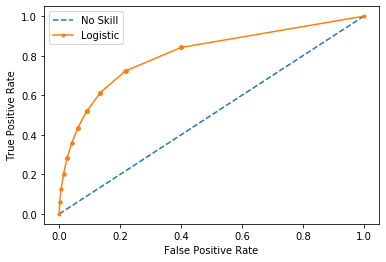

In [14]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
rf_probs = rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [15]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = X_train.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
CourseSize,0.204903
PrevTermGPA,0.081850
CumulativeGPA,0.075067
CourseLevel,0.059680
CareerCreditCompletionPerc,0.052071
CareerFailedCredits,0.046507
CumulativeCreditsAttempted,0.044767
HighSchoolGPA,0.034102
PrevTermCreditsAttempted,0.031167
PrevTermCreditsCompletionPerc,0.029105


In [111]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_class = xgb.XGBClassifier().fit(X_train, y_train)

y_pred = xgb_class.predict(X_test)
predictions = [round(value) for value in y_pred]

evaluate_model(y_test, predictions)

Accuracy: 86.63%
Recall: 12.86%
Precision: 62.74%
F1 Score: 0.21
ROC AUC: 0.56


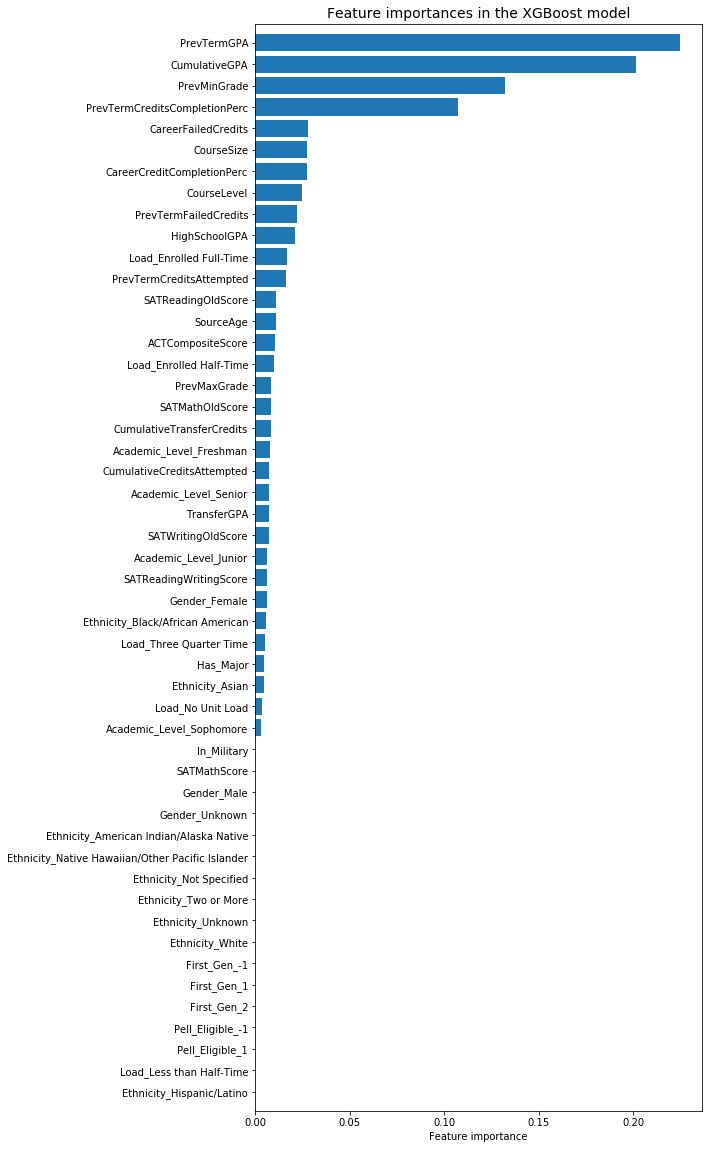

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline

# Producing a dataframe of feature importances
ft_weights_xgb_reg = pd.DataFrame(xgb_class.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)

# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

In [19]:
from tensorflow import keras
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import regularizers

neural = models.Sequential()
neural.add(layers.Dense(50, activation='relu', input_shape=(50,), kernel_regularizer=regularizers.l2(0.01)))
neural.add(layers.Dropout(0.5))
neural.add(layers.Dense(25, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
neural.add(layers.Dropout(0.5))
neural.add(layers.Dense(10, activation='relu'))
neural.add(layers.Dense(1))

neural.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

history = neural.fit(X_train, y_train, batch_size=64, epochs=15, validation_data=(X_test, y_test))

Train on 208997 samples, validate on 52250 samples
Epoch 1/15
208997/208997 [==============================] - 5s 25us/step - loss: 0.5834 - acc: 0.8578 - val_loss: 0.3744 - val_acc: 0.8610
Epoch 2/15
208997/208997 [==============================] - 5s 24us/step - loss: 0.3710 - acc: 0.8613 - val_loss: 0.3588 - val_acc: 0.8607
Epoch 3/15
208997/208997 [==============================] - 5s 24us/step - loss: 0.3662 - acc: 0.8614 - val_loss: 0.3561 - val_acc: 0.8601
Epoch 4/15
208997/208997 [==============================] - 5s 24us/step - loss: 0.3657 - acc: 0.8614 - val_loss: 0.3626 - val_acc: 0.8608
Epoch 5/15
208997/208997 [==============================] - 5s 25us/step - loss: 0.3649 - acc: 0.8614 - val_loss: 0.3619 - val_acc: 0.8592
Epoch 6/15
208997/208997 [==============================] - 5s 26us/step - loss: 0.3647 - acc: 0.8619 - val_loss: 0.3586 - val_acc: 0.8590
Epoch 7/15
208997/208997 [==============================] - 5s 25us/step - loss: 0.3650 - acc: 0.8613 - val_loss: 0

In [51]:
nn_predictions = neural.predict(X_test)
predictions = nn_predictions.copy()

predictions[nn_predictions >= 0.3] = 1
predictions[nn_predictions < 0.3] = 0

evaluate_model(y_test, predictions)

Accuracy: 86.23%
Recall: 10.71%
Precision: 56.28%
F1 Score: 0.18
ROC AUC: 0.55


In [97]:
rf_predictions = np.asarray(rf.predict_proba(X_test))
xgb_predictions = np.asarray(xgb_class.predict_proba(X_test))
lr_predictions = np.asarray(log_reg.predict_proba(X_test))

#nn_predictions = neural.predict(X_test)
#nn_predictions = nn_predictions[:, 0]

predictions = rf_predictions + xgb_predictions + lr_predictions

predictions = predictions [:, 0]

predictions[predictions <= 1.7] = 1
predictions[predictions > 1.7] = 0

evaluate_model(y_test, predictions)

[2.80999729 2.87503759 2.95543055 ... 2.57157906 2.61643539 2.83205096]
Accuracy: 87.71%
Recall: 27.97%
Precision: 64.93%
F1 Score: 0.39
ROC AUC: 0.63
